In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings  
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('sgemm_product.csv')

In [3]:
df.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81


In [4]:
df.columns

Index(['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'MDIMA', 'NDIMB', 'KWI', 'VWM',
       'VWN', 'STRM', 'STRN', 'SA', 'SB', 'Run1 (ms)', 'Run2 (ms)',
       'Run3 (ms)', 'Run4 (ms)'],
      dtype='object')

In [5]:
df.isna().sum()

MWG          0
NWG          0
KWG          0
MDIMC        0
NDIMC        0
MDIMA        0
NDIMB        0
KWI          0
VWM          0
VWN          0
STRM         0
STRN         0
SA           0
SB           0
Run1 (ms)    0
Run2 (ms)    0
Run3 (ms)    0
Run4 (ms)    0
dtype: int64

In [6]:
df['Run'] = (df['Run1 (ms)'] + df['Run2 (ms)'] + df['Run3 (ms)'] + df['Run4 (ms)'] )/4
data = df.copy()

In [7]:
df.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms),Run
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80,116.3700
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19,78.7050
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97,80.5650
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58,86.6375
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81,118.6625


In [8]:
df = df.drop(['Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)'],axis=1)
df.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,116.3700
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.7050
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,80.5650
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,86.6375
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,118.6625


In [9]:
df1 = df.sample(n=5000, random_state=0)


In [10]:
X = df1.iloc[:,:]
print(X.shape,)

(5000, 15)


In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [12]:
X

array([[-0.38027308,  1.16791265, -1.22117997, ..., -1.03087646,
         1.00561577,  1.74127624],
       [-1.13448388,  1.16791265,  0.81888012, ..., -1.03087646,
        -0.99441559, -0.47643727],
       [ 1.12814851, -1.49075029, -1.22117997, ..., -1.03087646,
        -0.99441559, -0.38599717],
       ...,
       [-1.13448388,  1.16791265, -1.22117997, ...,  0.97004834,
        -0.99441559, -0.46244742],
       [-0.38027308, -1.49075029, -1.22117997, ...,  0.97004834,
        -0.99441559, -0.46692417],
       [-1.13448388,  1.16791265,  0.81888012, ..., -1.03087646,
         1.00561577, -0.46152858]])

# K-Means Clustering

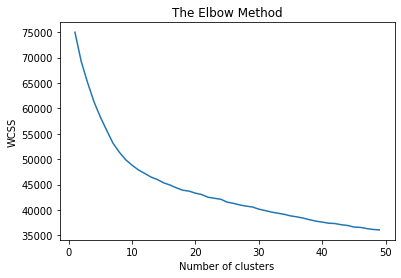

In [13]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 50):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 50), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [14]:
X1 = pd.DataFrame(X)
X1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-0.380273,1.167913,-1.22118,-0.761420,-0.742861,-1.009450,-0.153000,0.981766,-0.738548,-0.199446,-1.016944,-1.026758,-1.030876,1.005616,1.741276
1,-1.134484,1.167913,0.81888,0.237556,0.267559,-1.009450,-0.996441,0.981766,-0.204761,2.971400,-1.016944,0.973939,-1.030876,-0.994416,-0.476437
2,1.128149,-1.490750,-1.22118,-0.761420,0.267559,-1.009450,-0.153000,0.981766,-0.204761,-0.727921,0.983339,0.973939,-1.030876,-0.994416,-0.385997
3,1.128149,-1.110941,-1.22118,-0.761420,0.267559,-0.158742,1.533881,0.981766,0.862813,-0.727921,-1.016944,0.973939,0.970048,1.005616,-0.460064
4,1.128149,1.167913,0.81888,-0.761420,0.267559,-0.158742,1.533881,0.981766,0.862813,-0.727921,0.983339,-1.026758,-1.030876,-0.994416,0.795223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1.128149,-0.351323,-1.22118,-0.761420,-0.742861,1.542674,-0.153000,0.981766,-0.204761,-0.727921,0.983339,-1.026758,-1.030876,-0.994416,0.780612
4996,-1.134484,1.167913,0.81888,-0.761420,-0.742861,-1.009450,1.533881,0.981766,0.862813,0.857503,-1.016944,0.973939,-1.030876,-0.994416,0.114266
4997,-1.134484,1.167913,-1.22118,0.237556,-0.742861,-0.158742,-0.996441,0.981766,-0.738548,-0.199446,-1.016944,-1.026758,0.970048,-0.994416,-0.462447
4998,-0.380273,-1.490750,-1.22118,-0.761420,-0.742861,-1.009450,-0.996441,0.981766,-0.204761,-0.199446,0.983339,-1.026758,0.970048,-0.994416,-0.466924


In [15]:
kmeans = KMeans(n_clusters = 10, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [16]:
y_kmeans

array([3, 9, 6, ..., 7, 6, 9])

In [17]:
clustersDf = pd.DataFrame(y_kmeans)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([X1, clustersDf], axis = 1).reset_index()

In [18]:
combinedDf.drop(columns= 'index')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,cluster_predicted
0,-0.380273,1.167913,-1.22118,-0.761420,-0.742861,-1.009450,-0.153000,0.981766,-0.738548,-0.199446,-1.016944,-1.026758,-1.030876,1.005616,1.741276,3
1,-1.134484,1.167913,0.81888,0.237556,0.267559,-1.009450,-0.996441,0.981766,-0.204761,2.971400,-1.016944,0.973939,-1.030876,-0.994416,-0.476437,9
2,1.128149,-1.490750,-1.22118,-0.761420,0.267559,-1.009450,-0.153000,0.981766,-0.204761,-0.727921,0.983339,0.973939,-1.030876,-0.994416,-0.385997,6
3,1.128149,-1.110941,-1.22118,-0.761420,0.267559,-0.158742,1.533881,0.981766,0.862813,-0.727921,-1.016944,0.973939,0.970048,1.005616,-0.460064,5
4,1.128149,1.167913,0.81888,-0.761420,0.267559,-0.158742,1.533881,0.981766,0.862813,-0.727921,0.983339,-1.026758,-1.030876,-0.994416,0.795223,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1.128149,-0.351323,-1.22118,-0.761420,-0.742861,1.542674,-0.153000,0.981766,-0.204761,-0.727921,0.983339,-1.026758,-1.030876,-0.994416,0.780612,2
4996,-1.134484,1.167913,0.81888,-0.761420,-0.742861,-1.009450,1.533881,0.981766,0.862813,0.857503,-1.016944,0.973939,-1.030876,-0.994416,0.114266,5
4997,-1.134484,1.167913,-1.22118,0.237556,-0.742861,-0.158742,-0.996441,0.981766,-0.738548,-0.199446,-1.016944,-1.026758,0.970048,-0.994416,-0.462447,7
4998,-0.380273,-1.490750,-1.22118,-0.761420,-0.742861,-1.009450,-0.996441,0.981766,-0.204761,-0.199446,0.983339,-1.026758,0.970048,-0.994416,-0.466924,6


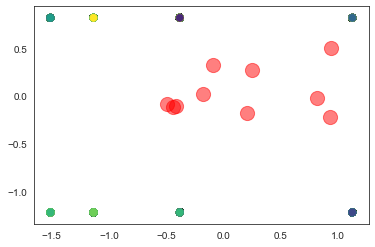

In [30]:
plt.scatter(X[:, 0], X[:, 2], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 2], c='red', s=200, alpha=0.5);

In [19]:
df.columns

Index(['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'MDIMA', 'NDIMB', 'KWI', 'VWM',
       'VWN', 'STRM', 'STRN', 'SA', 'SB', 'Run'],
      dtype='object')

# Expectation Maximization

In [38]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3).fit(X)
pred_gmm = gmm.predict(X)

In [39]:
pred_gmm

array([0, 0, 2, ..., 2, 2, 1], dtype=int64)

In [40]:
clustersDfg = pd.DataFrame(pred_gmm)
X1 = pd.DataFrame(X)
clustersDfg.columns = ['cluster_predicted']
combinedDfg = pd.concat([X1, clustersDfg], axis = 1).reset_index()

In [41]:
combinedDfg = combinedDfg.drop(columns= 'index')


In [42]:
combinedDfg

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,cluster_predicted
0,-0.380273,1.167913,-1.22118,-0.761420,-0.742861,-1.009450,-0.153000,0.981766,-0.738548,-0.199446,-1.016944,-1.026758,-1.030876,1.005616,1.741276,0
1,-1.134484,1.167913,0.81888,0.237556,0.267559,-1.009450,-0.996441,0.981766,-0.204761,2.971400,-1.016944,0.973939,-1.030876,-0.994416,-0.476437,0
2,1.128149,-1.490750,-1.22118,-0.761420,0.267559,-1.009450,-0.153000,0.981766,-0.204761,-0.727921,0.983339,0.973939,-1.030876,-0.994416,-0.385997,2
3,1.128149,-1.110941,-1.22118,-0.761420,0.267559,-0.158742,1.533881,0.981766,0.862813,-0.727921,-1.016944,0.973939,0.970048,1.005616,-0.460064,2
4,1.128149,1.167913,0.81888,-0.761420,0.267559,-0.158742,1.533881,0.981766,0.862813,-0.727921,0.983339,-1.026758,-1.030876,-0.994416,0.795223,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1.128149,-0.351323,-1.22118,-0.761420,-0.742861,1.542674,-0.153000,0.981766,-0.204761,-0.727921,0.983339,-1.026758,-1.030876,-0.994416,0.780612,0
4996,-1.134484,1.167913,0.81888,-0.761420,-0.742861,-1.009450,1.533881,0.981766,0.862813,0.857503,-1.016944,0.973939,-1.030876,-0.994416,0.114266,0
4997,-1.134484,1.167913,-1.22118,0.237556,-0.742861,-0.158742,-0.996441,0.981766,-0.738548,-0.199446,-1.016944,-1.026758,0.970048,-0.994416,-0.462447,2
4998,-0.380273,-1.490750,-1.22118,-0.761420,-0.742861,-1.009450,-0.996441,0.981766,-0.204761,-0.199446,0.983339,-1.026758,0.970048,-0.994416,-0.466924,2


In [48]:
combinedDfg.head(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,cluster_predicted
0,-0.380273,1.167913,-1.22118,-0.761420,-0.742861,-1.009450,-0.153000,0.981766,-0.738548,-0.199446,-1.016944,-1.026758,-1.030876,1.005616,1.741276,0
1,-1.134484,1.167913,0.81888,0.237556,0.267559,-1.009450,-0.996441,0.981766,-0.204761,2.971400,-1.016944,0.973939,-1.030876,-0.994416,-0.476437,0
2,1.128149,-1.490750,-1.22118,-0.761420,0.267559,-1.009450,-0.153000,0.981766,-0.204761,-0.727921,0.983339,0.973939,-1.030876,-0.994416,-0.385997,2
3,1.128149,-1.110941,-1.22118,-0.761420,0.267559,-0.158742,1.533881,0.981766,0.862813,-0.727921,-1.016944,0.973939,0.970048,1.005616,-0.460064,2
4,1.128149,1.167913,0.81888,-0.761420,0.267559,-0.158742,1.533881,0.981766,0.862813,-0.727921,0.983339,-1.026758,-1.030876,-0.994416,0.795223,0
5,1.128149,1.167913,0.81888,0.237556,0.267559,-0.158742,-0.153000,-1.018572,2.997962,-0.199446,-1.016944,-1.026758,0.970048,1.005616,-0.050717,0
6,1.128149,-0.351323,-1.22118,-0.761420,0.267559,-0.158742,-0.153000,-1.018572,-0.204761,-0.199446,-1.016944,0.973939,-1.030876,-0.994416,0.298974,1
7,1.128149,1.167913,0.81888,0.237556,0.267559,-0.158742,-0.153000,-1.018572,2.997962,0.857503,-1.016944,-1.026758,0.970048,-0.994416,0.060373,0
8,1.128149,1.167913,0.81888,0.237556,0.267559,-1.009450,-0.996441,0.981766,0.862813,-0.199446,0.983339,0.973939,-1.030876,1.005616,-0.098614,1
9,-0.380273,1.167913,0.81888,2.235508,-0.742861,-1.009450,1.533881,0.981766,-0.204761,0.857503,0.983339,-1.026758,0.970048,-0.994416,-0.470530,1


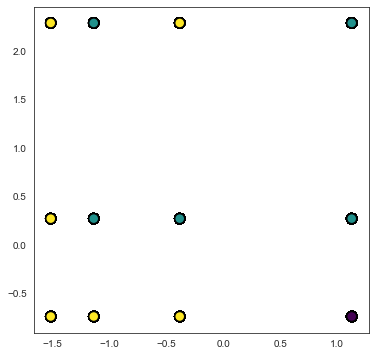

In [47]:
# Plot the clusters
plt.figure( figsize=(6,6))
plt.scatter(combinedDfg.iloc[:,0], combinedDfg.iloc[:,4], c=pred_gmm, edgecolor='black', lw=1.5, s=100, cmap=plt.get_cmap('viridis'))
plt.show()